<a href="https://colab.research.google.com/github/Shubhangidharmik/global-terrorism/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/(extra) global terrorism/Copy of Global Terrorism Data.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
df.shape

(181691, 135)

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Data Cleaning**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


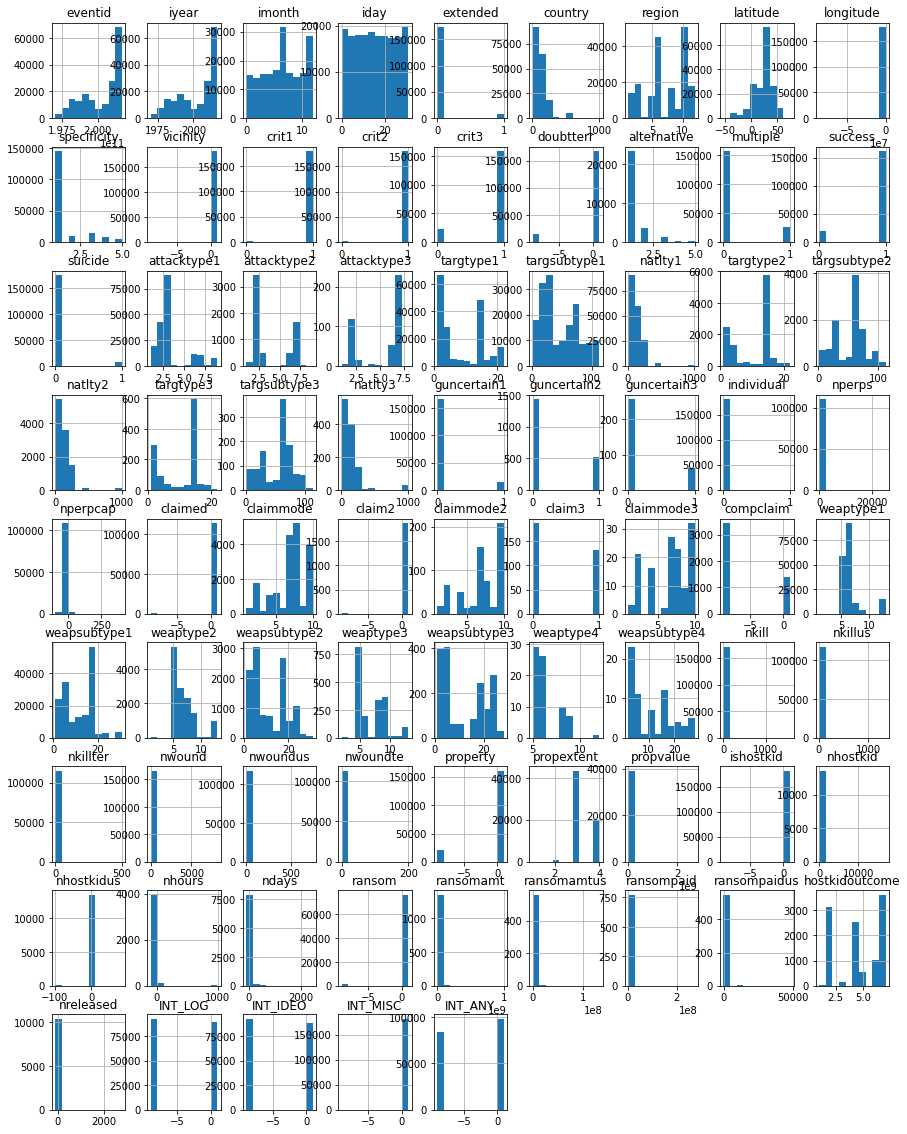

In [26]:
   fig = plt.figure(figsize = (15,20))
   ax = fig.gca()
   df.hist(ax = ax);

In [28]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [46]:
x=df['related'].replace(',',' ')

In [65]:
df1 = df.columns
for elem in df1:
  df[elem].fillna('0', inplace = True)

In [68]:
df.head(20)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,"September 18-24, 2016",0,0,58,Dominican Republic,2,...,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,...,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,...,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,...,0,0,0,0,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,...,0,0,0,0,PGIS,-9,-9,1,1,0
5,197001010002,1970,1,1,0,0,0,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,0
6,197001020001,1970,1,2,0,0,0,218,Uruguay,3,...,0,0,0,0,PGIS,0,0,0,0,0
7,197001020002,1970,1,2,0,0,0,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",0,Hewitt Project,-9,-9,0,-9,0
8,197001020003,1970,1,2,0,0,0,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,0
9,197001030001,1970,1,3,0,0,0,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,0


In [72]:
null=df.isnull().sum()
null.tail(50)

weaptype2             0
weaptype2_txt         0
weapsubtype2          0
weapsubtype2_txt      0
weaptype3             0
weaptype3_txt         0
weapsubtype3          0
weapsubtype3_txt      0
weaptype4             0
weaptype4_txt         0
weapsubtype4          0
weapsubtype4_txt      0
weapdetail            0
nkill                 0
nkillus               0
nkillter              0
nwound                0
nwoundus              0
nwoundte              0
property              0
propextent            0
propextent_txt        0
propvalue             0
propcomment           0
ishostkid             0
nhostkid              0
nhostkidus            0
nhours                0
ndays                 0
divert                0
kidhijcountry         0
ransom                0
ransomamt             0
ransomamtus           0
ransompaid            0
ransompaidus          0
ransomnote            0
hostkidoutcome        0
hostkidoutcome_txt    0
nreleased             0
addnotes              0
scite1          

In [73]:
df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

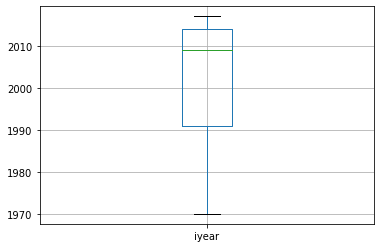

In [75]:
df.boxplot('iyear');

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


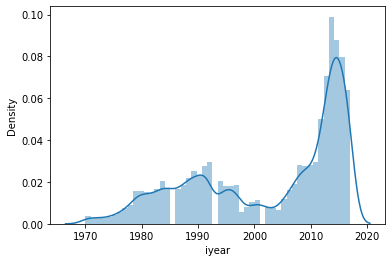

In [74]:
sns.distplot(df['iyear']);
plt.show()

In [76]:
df['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


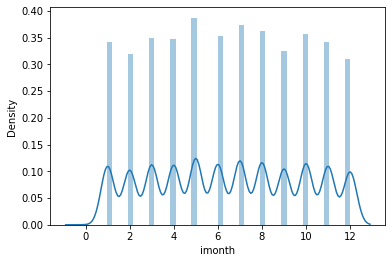

In [77]:
sns.distplot(df['imonth']);
plt.show()

In [78]:
df['country'].value_counts()

95     24636
153    14368
4      12731
92     11960
45      8306
       ...  
422        1
226        1
428        1
7          1
10         1
Name: country, Length: 205, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


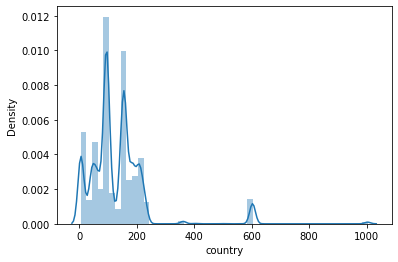

In [81]:
sns.distplot(df['country']);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


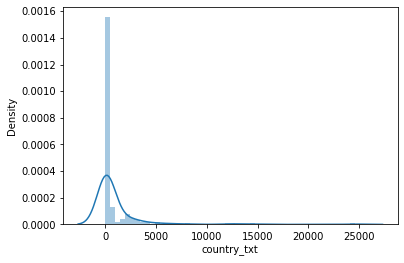

In [87]:
sns.distplot(df['country_txt'].value_counts());
plt.show()

**Top Five affected countries**

In [146]:
country_name = df['country_txt'].value_counts()

In [147]:
country_name.head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64

In [80]:
df['region'].value_counts()

10    50474
6     44974
3     18978
11    17550
8     16639
5     12485
2     10344
9      5144
1      3456
4       802
7       563
12      282
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


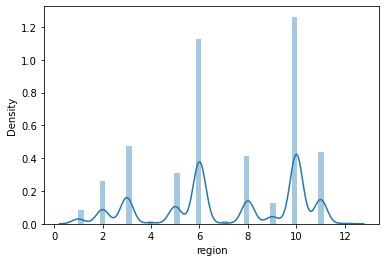

In [88]:
sns.distplot(df['region']);
plt.show()

**Regions affected in year** 

In [109]:
grp = df.groupby(df['iyear'])
x= grp['country_txt']
y= grp['region'].agg(np.mean)
z= grp['country'].agg(np.mean)


Text(0, 0.5, 'region')

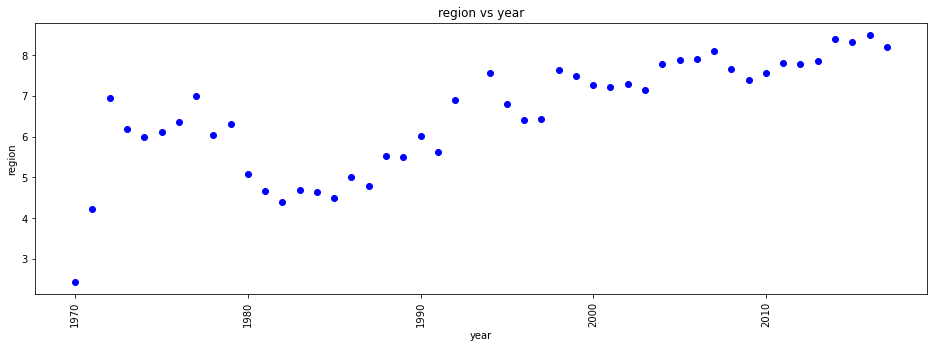

In [107]:
plt.figure(figsize=(16,5))
plt.plot(y, 'ro', color='b')
plt.xticks(rotation=90)
plt.title('region vs year')
plt.xlabel('year')
plt.ylabel('region')

**country vs year**

Text(0, 0.5, 'country')

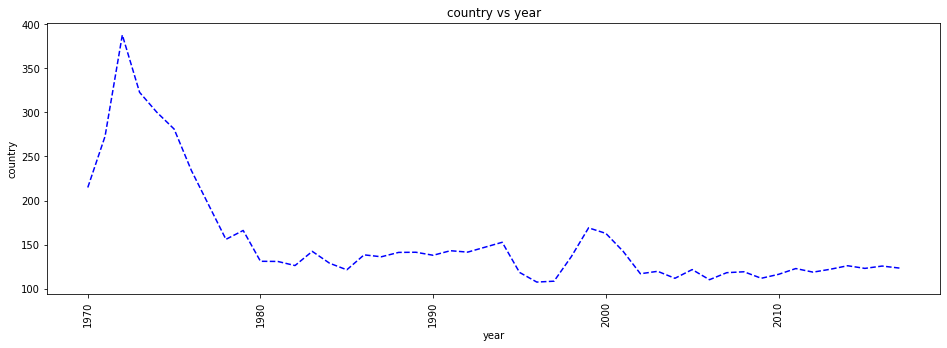

In [108]:
plt.figure(figsize=(16,5))
plt.plot(z, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('country vs year')
plt.xlabel('year')
plt.ylabel('country')

In [112]:
df['country_txt'].astype('object')

0         Dominican Republic
1                     Mexico
2                Philippines
3                     Greece
4                      Japan
                 ...        
181686               Somalia
181687                 Syria
181688           Philippines
181689                 India
181690           Philippines
Name: country_txt, Length: 181691, dtype: object

In [118]:
grp1 = df.groupby(df['country_txt'])
x= grp1['iyear'].agg(np.mean)
y= grp1['region'].agg(np.mean)
z= grp1['country'].agg(np.mean)

Text(0, 0.5, 'year')

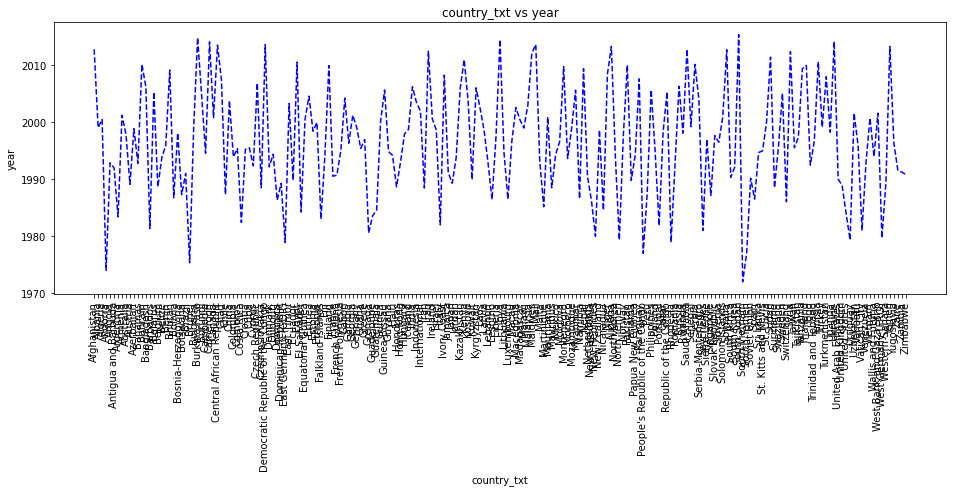

In [120]:
plt.figure(figsize=(16,5))
plt.plot(x, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('country_txt vs year')
plt.xlabel('country_txt')
plt.ylabel('year')

Text(0, 0.5, 'region')

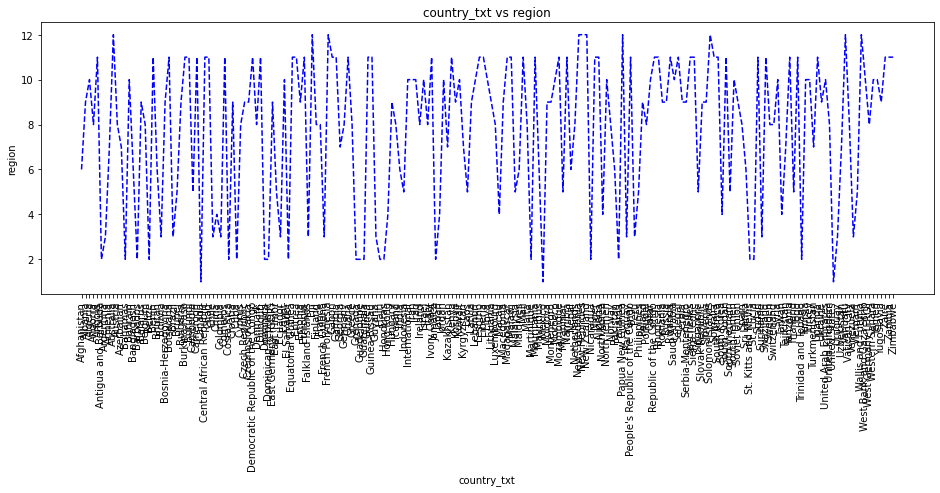

In [121]:
plt.figure(figsize=(16,5))
plt.plot(y, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('country_txt vs region')
plt.xlabel('country_txt')
plt.ylabel('region')

Text(0, 0.5, 'country')

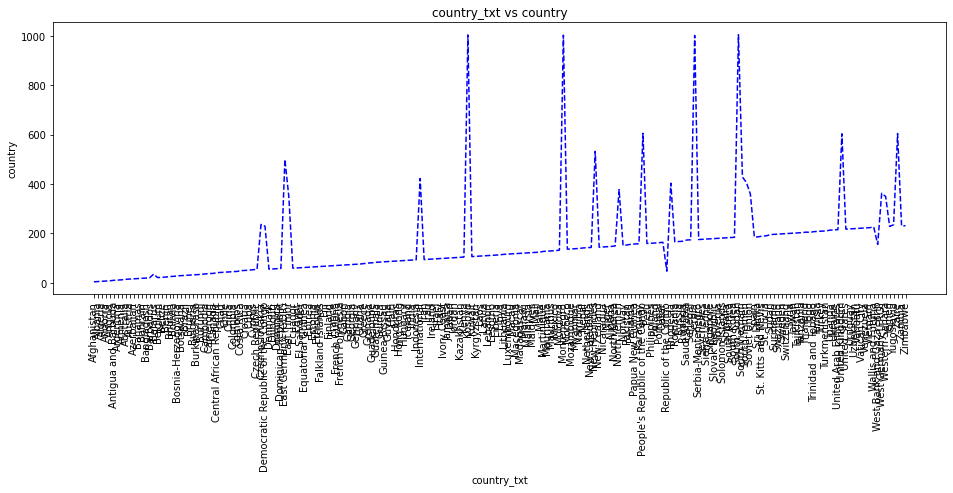

In [124]:
plt.figure(figsize=(16,5))
plt.plot(z, 'r--', color='b')
plt.xticks(rotation=90)
plt.title('country_txt vs country')
plt.xlabel('country_txt')
plt.ylabel('country')

In [158]:
grp2 = df.groupby(df['country_txt'])
w= grp2['country_txt'].count().head()
x= grp2['iyear'].agg(np.mean)
y= grp2['region'].agg(np.mean)
z= grp2['country'].agg(np.mean)

In [174]:
x = df.nlargest(5,['country'])
x

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,country_name
105433,201201280019,2012,1,28,0,0,0,1004,South Sudan,11,...,"""Gunmen kill 40 people in Warrap state of So...",0,0,START Primary Collection,-9,-9,0,-9,0,0
105970,201202260011,2012,2,26,0,0,0,1004,South Sudan,11,...,"""Sudan: Rebels Seize Army Post,"" The New York ...","""Sudan rebels claim to have killed 130 soldier...","""Armed clashes break out on Sudan, South Sudan...",START Primary Collection,1,0,1,1,0,0
106405,201203160010,2012,3,16,0,1,0,1004,South Sudan,11,...,"""Jonglei: Three people killed in bus attack,...",0,0,START Primary Collection,-9,-9,0,-9,0,0
107358,201204270035,2012,4,27,0,0,0,1004,South Sudan,11,...,"""S.Sudan repels attack by Sudan-backed r...","""Update:APNewsNow.,"" The Canadian Press - Broa...","""South Sudan army repulses ""militia"" attack ...",START Primary Collection,0,1,0,1,0,0
110424,201208220011,2012,8,23,0,1,0,1004,South Sudan,11,...,"""Rebels kill 24 South Sudan soldiers, army say...","""24 South Sudan soldiers killed,"" Shenzhen Dai...","""South Sudan rebels killed at least 24 sol...",START Primary Collection,0,0,0,0,0,0


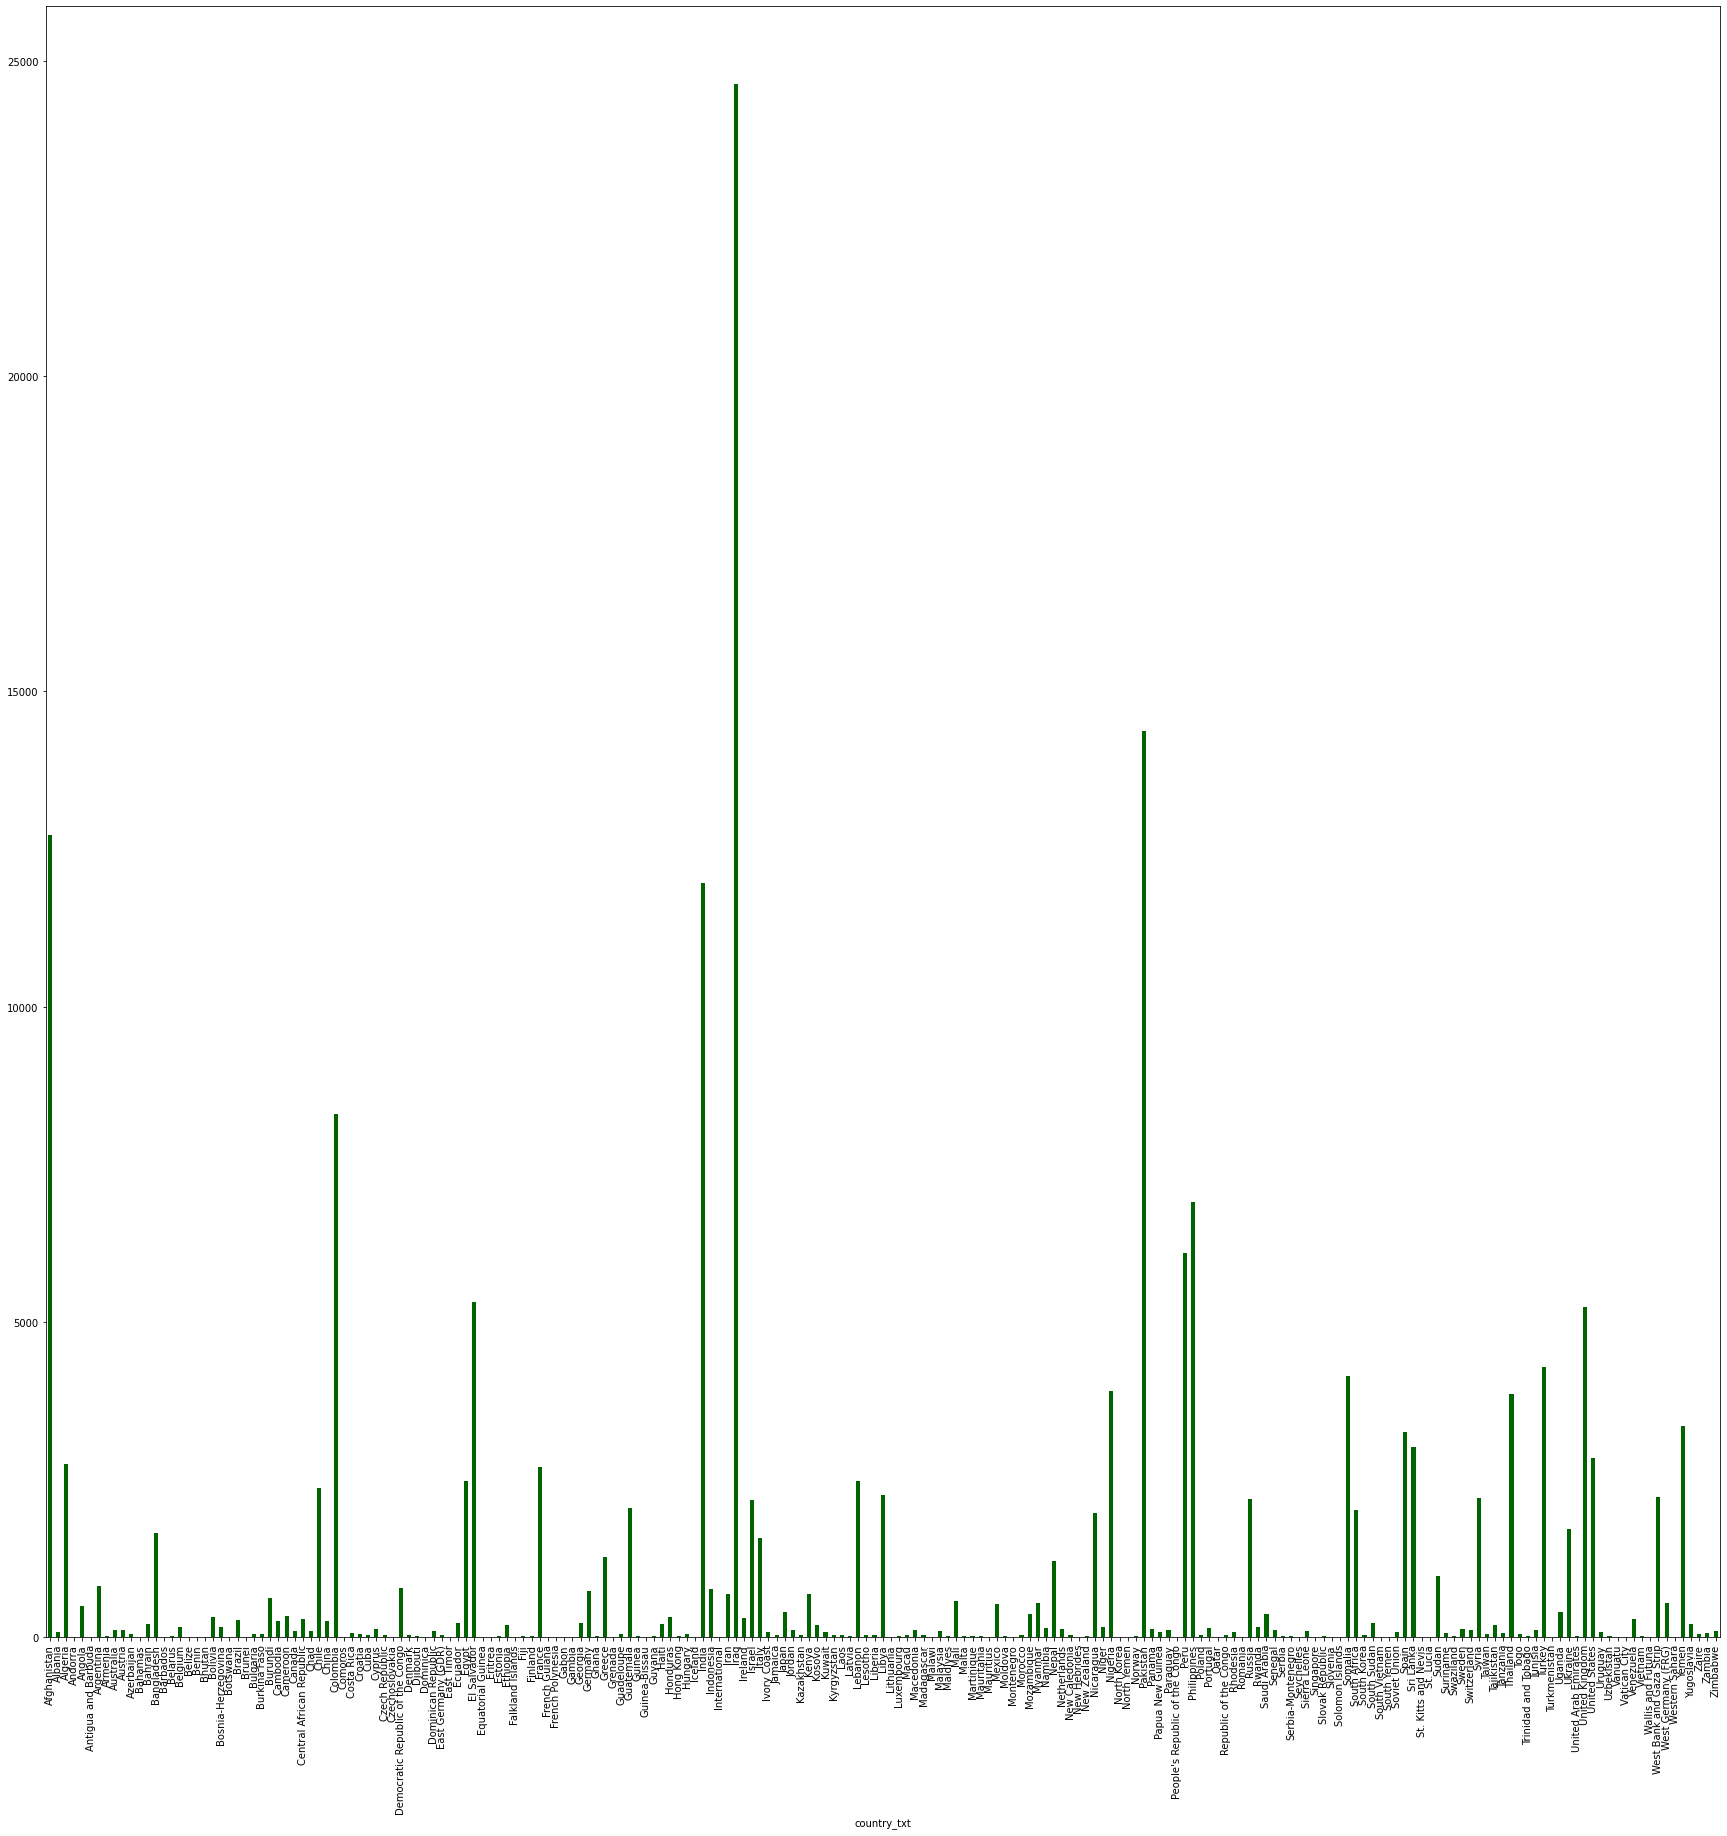

In [173]:
plt.figure(figsize = (30,30))
df.groupby(['country_txt'])['country_txt'].count().plot.bar(color="darkgreen")
plt.show()

## conclusion ##

1. Top five affected country are 

  i   Iraq           24636

  ii  Pakistan       14368

  iii Afghanistan    12731

  iv  India          11960

  v   Colombia       8306

2. Maximum regions of country affected increase from year 2000

3. Number of terrorism highly increase from 2010